In [ ]:
print("Bismillah")

Bismillah


In [ ]:
print(2+2)


4


In [ ]:
l = ['a','123',125]
print(l[2]*2)

def ll(n):
  return n**n

print(ll(4))

250
256


In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlt

In [ ]:
!pip install pandas numpy scikit-learn matplotlib seaborn fastapi uvicorn


In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdullaalkibria","key":"e5d700db6041418689df7672a5995412"}'}

In [4]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d shivamb/machine-predictive-maintenance-classification
!unzip machine-predictive-maintenance-classification.zip


Dataset URL: https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification
License(s): CC0-1.0
  0% 0.00/137k [00:00<?, ?B/s]
100% 137k/137k [00:00<00:00, 71.2MB/s]
Archive:  machine-predictive-maintenance-classification.zip
  inflating: predictive_maintenance.csv  


In [5]:
import pandas as pd

df = pd.read_csv("predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df.isnull().sum()  # Check for missing values
df.dropna(inplace=True)  # Drop if necessary

In [7]:
df.isnull().sum()  # Check for missing values
df.dropna(inplace=True)  # Drop if necessary


In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Normalize numerical columns
scaler = StandardScaler()
df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']] = scaler.fit_transform(
    df[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']]
)

# Encode categorical variables
encoder = LabelEncoder()
df['Type'] = encoder.fit_transform(df['Type'])

# Save the cleaned dataset
df.to_csv("preprocessed_data.csv", index=False)


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Target'])  # Features
y = df['Target']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
print(X_train.dtypes)



UDI                                        int64
Type                                       int64
Air temperature [K]                      float64
Process temperature [K]                  float64
Rotational speed [rpm]                   float64
Torque [Nm]                              float64
Tool wear [min]                          float64
Failure Type_Heat Dissipation Failure       bool
Failure Type_No Failure                     bool
Failure Type_Overstrain Failure             bool
Failure Type_Power Failure                  bool
Failure Type_Random Failures                bool
Failure Type_Tool Wear Failure              bool
dtype: object


In [17]:
X_train.drop(columns=['Product ID'], inplace=True)
X_test.drop(columns=['Product ID'], inplace=True)


In [11]:
X_train = pd.get_dummies(X_train, columns=['Failure Type'])
X_test = pd.get_dummies(X_test, columns=['Failure Type'])


In [12]:
df.head(10)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,2,-0.952389,-0.947360,0.068185,0.282200,-1.695984,0,No Failure
1,2,L47181,1,-0.902393,-0.879959,-0.729472,0.633308,-1.648852,0,No Failure
2,3,L47182,1,-0.952389,-1.014761,-0.227450,0.944290,-1.617430,0,No Failure
3,4,L47183,1,-0.902393,-0.947360,-0.590021,-0.048845,-1.586009,0,No Failure
4,5,L47184,1,-0.902393,-0.879959,-0.729472,0.001313,-1.554588,0,No Failure
5,6,M14865,2,-0.952389,-0.947360,-0.634645,0.191915,-1.523166,0,No Failure
6,7,L47186,1,-0.952389,-0.947360,0.107231,0.242073,-1.476034,0,No Failure
7,8,L47187,1,-0.952389,-0.947360,-0.065687,0.021376,-1.444613,0,No Failure
8,9,M14868,2,-0.852397,-0.879959,0.715235,-1.142297,-1.413191,0,No Failure
9,10,M14869,2,-0.752405,-0.677756,1.128009,-1.202487,-1.366059,0,No Failure


In [19]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)  # Convert text labels to numbers
y_test = encoder.transform(y_test)




In [20]:
import numpy as np

print(np.unique(y_train))  # Check unique values in y_train
print(y_train.dtype)       # Check data type of y_train



[0 1]
int64


In [21]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [22]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.999
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000



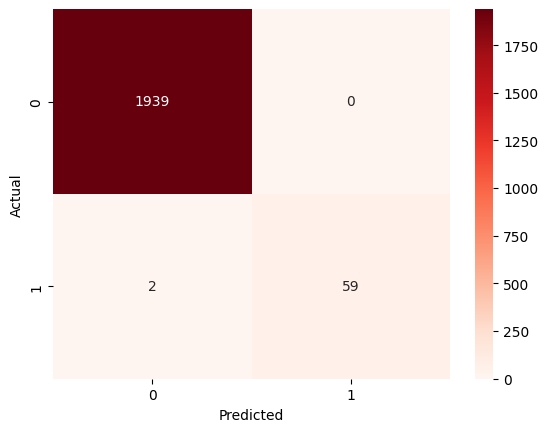

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [39]:
print(X_train.columns)  # Show all column names
print(X_test.columns)   # Check test set too


Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type_Heat Dissipation Failure', 'Failure Type_No Failure',
       'Failure Type_Overstrain Failure', 'Failure Type_Power Failure',
       'Failure Type_Random Failures', 'Failure Type_Tool Wear Failure'],
      dtype='object')
Index(['UDI', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Failure Type_Heat Dissipation Failure', 'Failure Type_No Failure',
       'Failure Type_Overstrain Failure', 'Failure Type_Power Failure',
       'Failure Type_Random Failures', 'Failure Type_Tool Wear Failure'],
      dtype='object')


In [40]:
import pickle

# One-Hot Encoding during training
# X_train = pd.get_dummies(X_train, columns=['Failure Type'])
# X_test = pd.get_dummies(X_test, columns=['Failure Type'])

# Save feature names
with open("feature_columns.pkl", "wb") as f:
    pickle.dump(X_train.columns.tolist(), f)

# Train and save model
model.fit(X_train, y_train)
with open("predictive_model.pkl", "wb") as f:
    pickle.dump(model, f)



In [41]:
from google.colab import files
files.download("predictive_model.pkl")
files.download("preprocessed_data.csv")
files.download("feature_columns.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [42]:
import numpy as np

print(np.unique(y_train, return_counts=True))  # Show unique labels and counts


(array([0, 1]), array([7722,  278]))
